<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/UNT-CSE-SpaceshipTitanic/blob/dev_avijeet/Spaceship_notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages, libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [ ]:

### Connect with google drive
def connect_and_fetch_train():

  drive.mount('/content/drive')

  ### Train & Test csv dir

  train_file = "1aFLIETCp08ZRwvYj29MPeHokzltUywhv"
  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  train_dir = f'https://drive.google.com/uc?id={train_file}'
  return train_dir

def connect_and_fetch_test():
  drive.mount('/content/drive')

  ### Train & Test csv dir

  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  test_dir = f'https://drive.google.com/uc?id={test_file}'
  return test_dir



In [ ]:
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Data Visualization

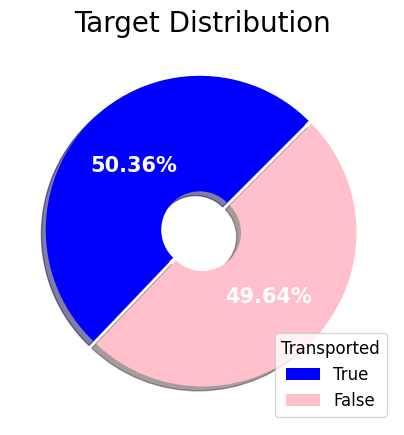

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

labels = df_train["Transported"].value_counts().index
lst = df_train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%', textprops=dict(color="white", fontsize=15, weight="bold"), colors=["blue", "pink"], shadow=True, wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)
plt.show()

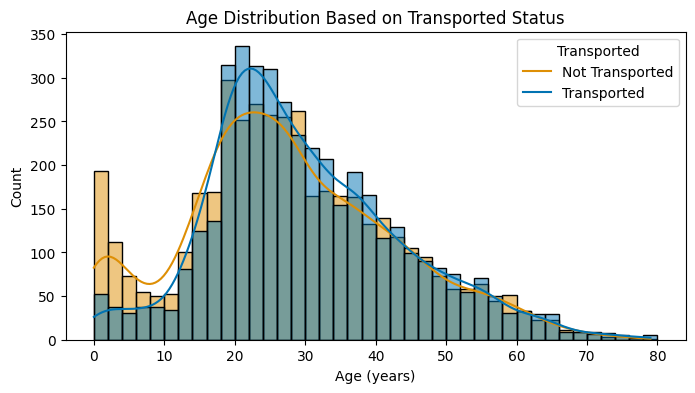

In [ ]:
# Figure size
plt.figure(figsize=(8, 4))

# Histogram with custom colors
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=2, kde=True, palette='colorblind')

# Plot title and labels
plt.title('Age Distribution Based on Transported Status')
plt.xlabel('Age (years)')

# Legend labels
legend_labels = ['Not Transported', 'Transported']
plt.legend(title='Transported', labels=legend_labels)

# Show the plot
plt.show()

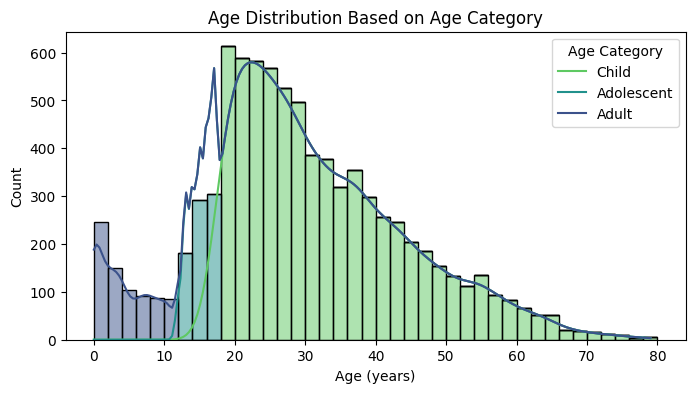

In [ ]:
#'Age' is the column in DataFrame
df_train['Age_Category'] = pd.cut(df_train['Age'], bins=[0, 12, 18, float('inf')], labels=['Child', 'Adolescent', 'Adult'], right=False)

# Figure size
plt.figure(figsize=(8, 4))

# Histogram with custom colors
sns.histplot(data=df_train, x='Age', hue='Age_Category', binwidth=2, kde=True, multiple='stack', palette='viridis')

# title and labels
plt.title('Age Distribution Based on Age Category')
plt.xlabel('Age (years)')

# Legend labels
legend_labels = ['Child', 'Adolescent', 'Adult']
plt.legend(title='Age Category', labels=legend_labels)

# Show the plot
plt.show()

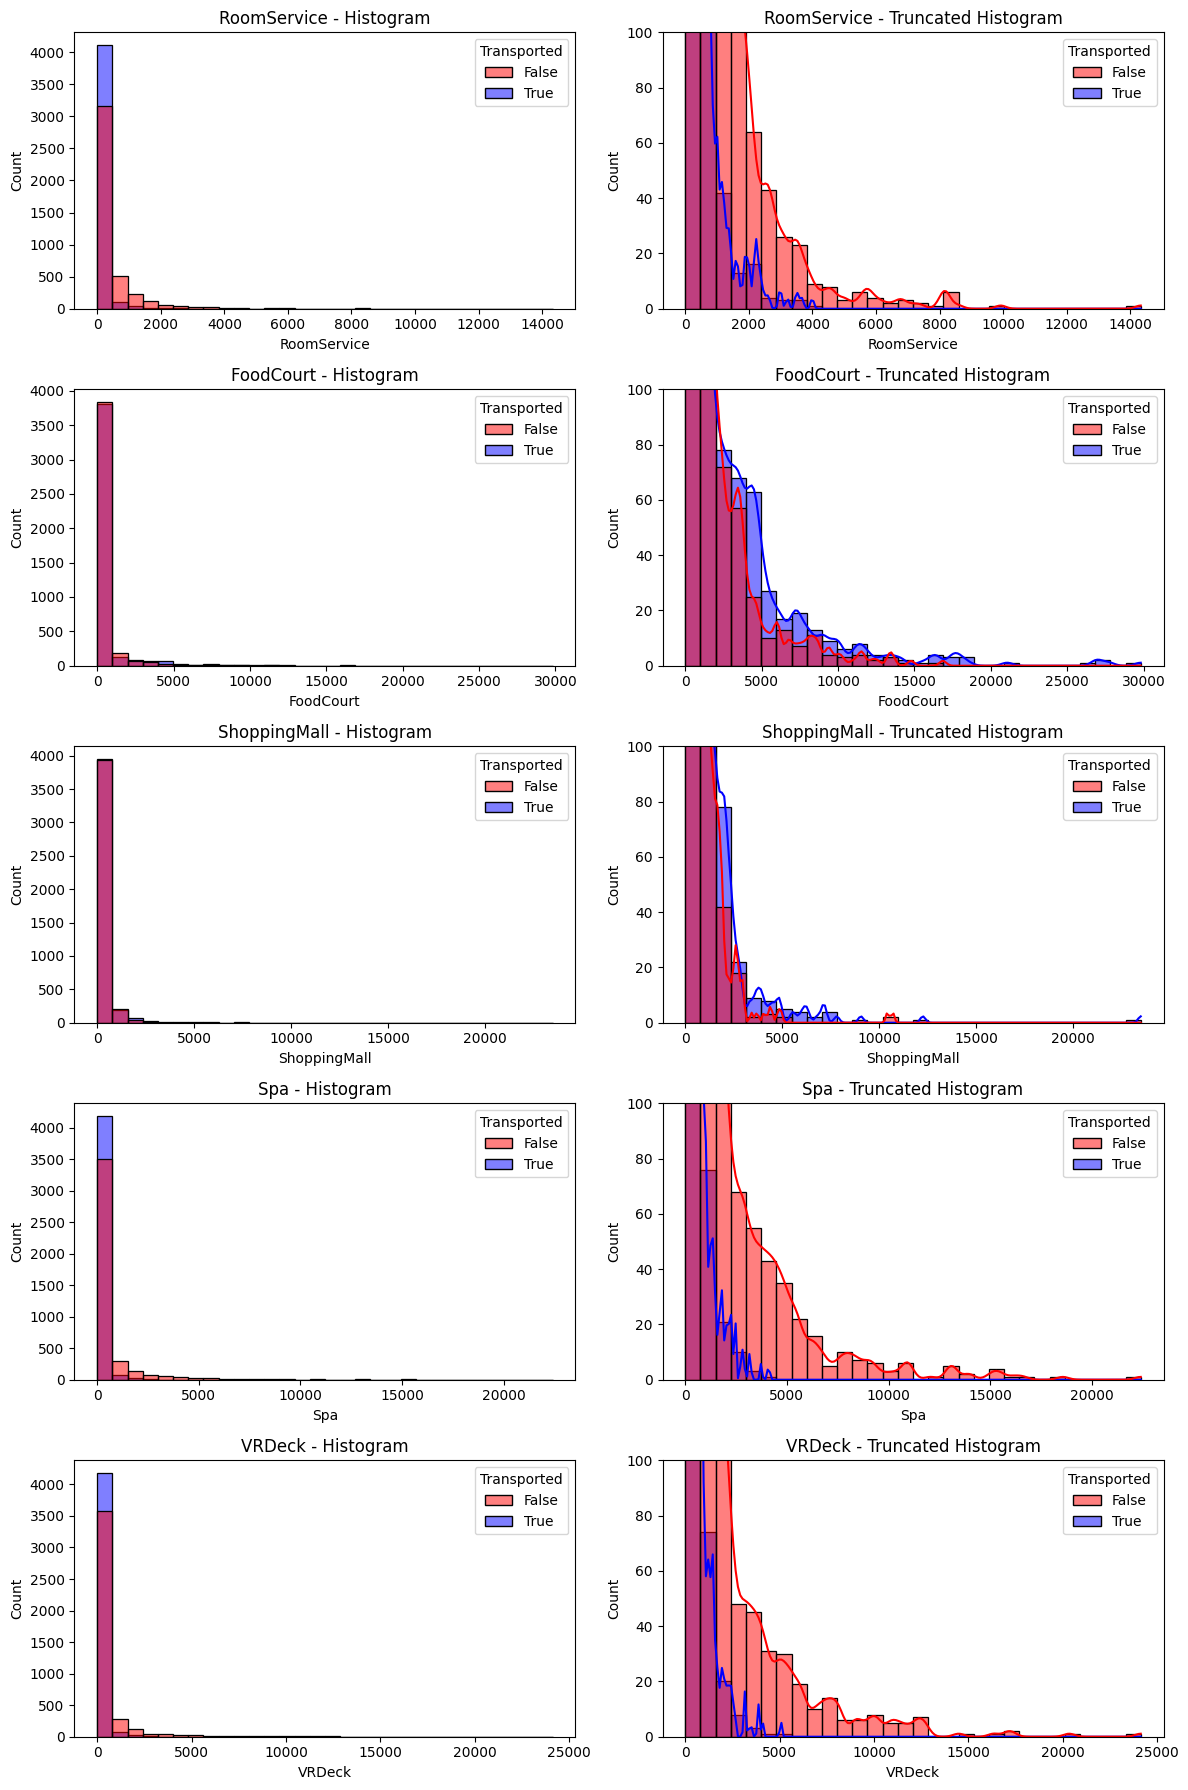

In [ ]:
# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a plot
plt.figure(figsize=(12, 18))

# Define custom colors
custom_palette = ['red', 'blue']

for i, var_name in enumerate(exp_feats):
    # Create the left plot
    plt.subplot(5, 2, 2 * i + 1)

    # Plot a histogram with custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=False, hue='Transported', palette=custom_palette)

    # Set title
    plt.title(f'{var_name} - Histogram')

    # Create the right plot (truncated)
    plt.subplot(5, 2, 2 * i + 2)

    # Plot a truncated histogram with KDE and custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=True, hue='Transported', palette=custom_palette)

    # Set y-axis limit
    plt.ylim([0, 100])

    # Set title
    plt.title(f'{var_name} - Truncated Histogram')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

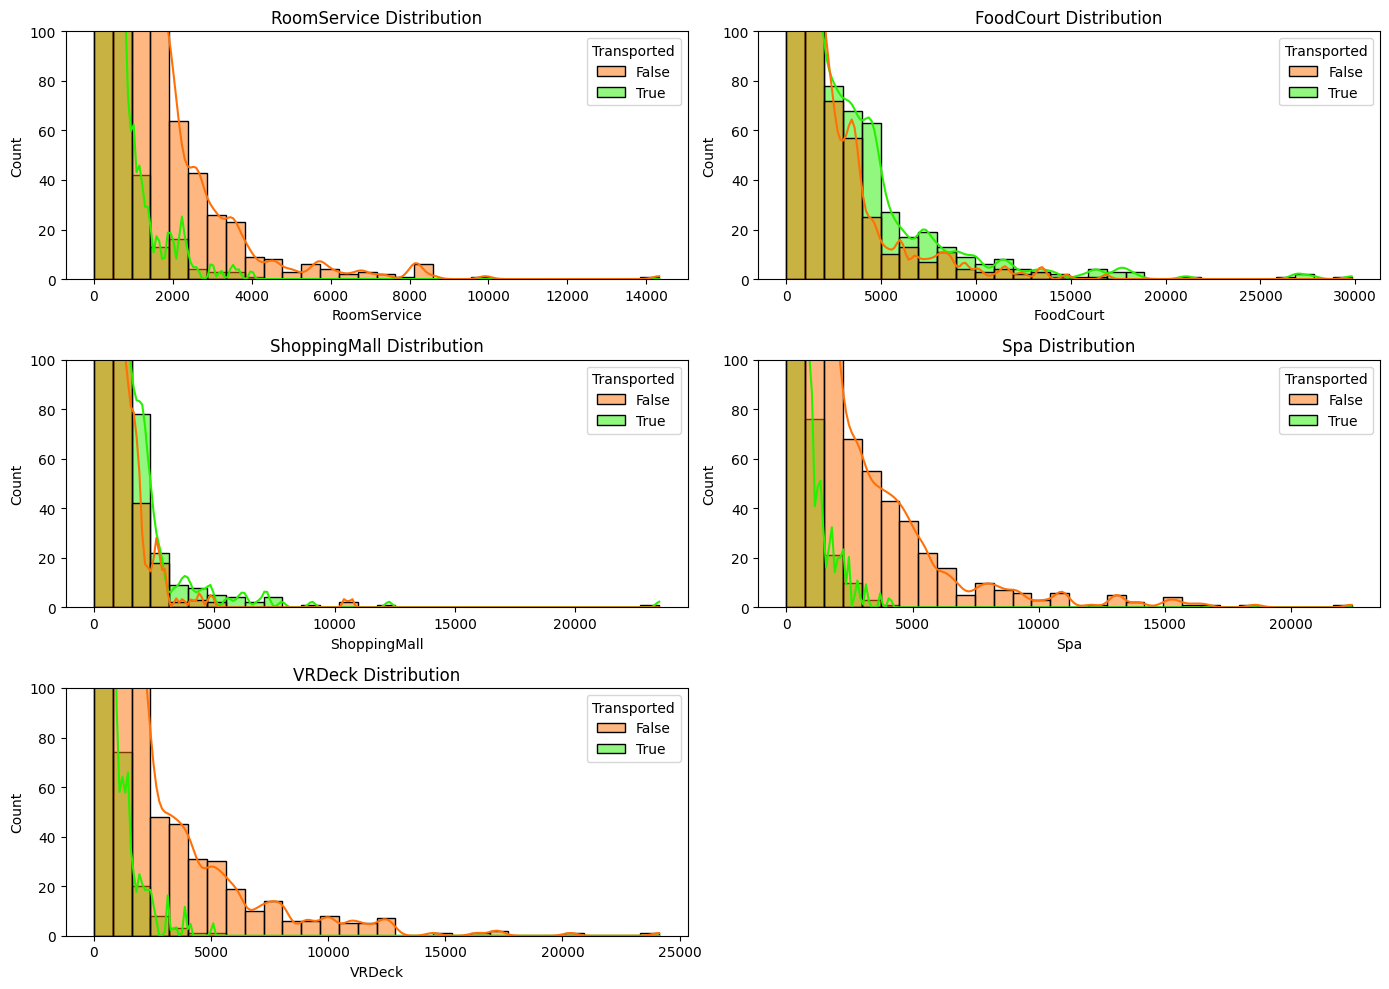

In [ ]:
# Specify the columns of interest
exp_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Set the figure size
plt.figure(figsize=(14, 10))

# Iterate over columns and create subplots
for idx, column in enumerate(exp_cols):
    plt.subplot(3, 2, idx + 1)

    # histogram with seaborn
    sns.histplot(x=column, hue="Transported", data=df_train, bins=30, kde=True, palette="gist_ncar_r")

    # Add title and adjust layout
    plt.title(f"{column} Distribution")
    plt.ylim(0, 100)
    plt.tight_layout()

# Show the plot
plt.show()

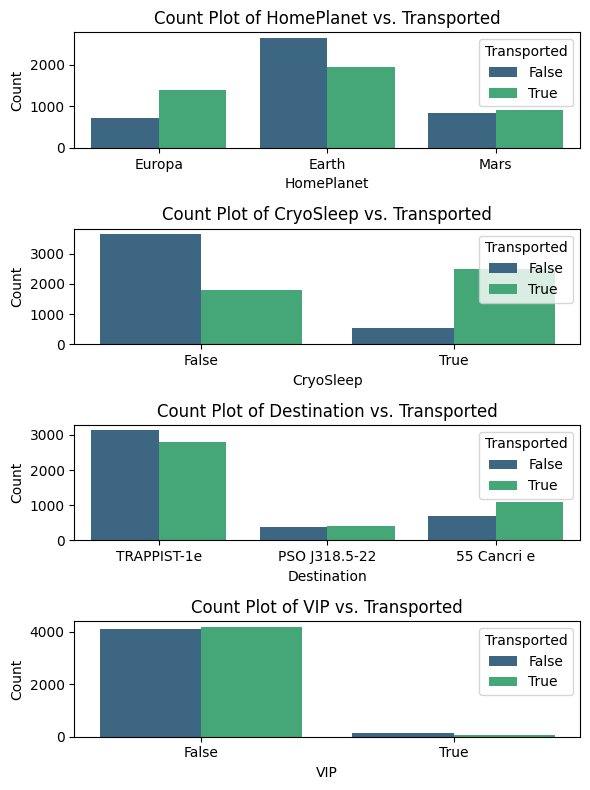

In [ ]:
# Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(6, 8))

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=df_train, x=feature, ax=ax, hue='Transported', palette='viridis')
    ax.set_ylabel('Count')
    ax.set_title(f'Count Plot of {feature} vs. Transported')
# show plot
fig.tight_layout()
plt.show()

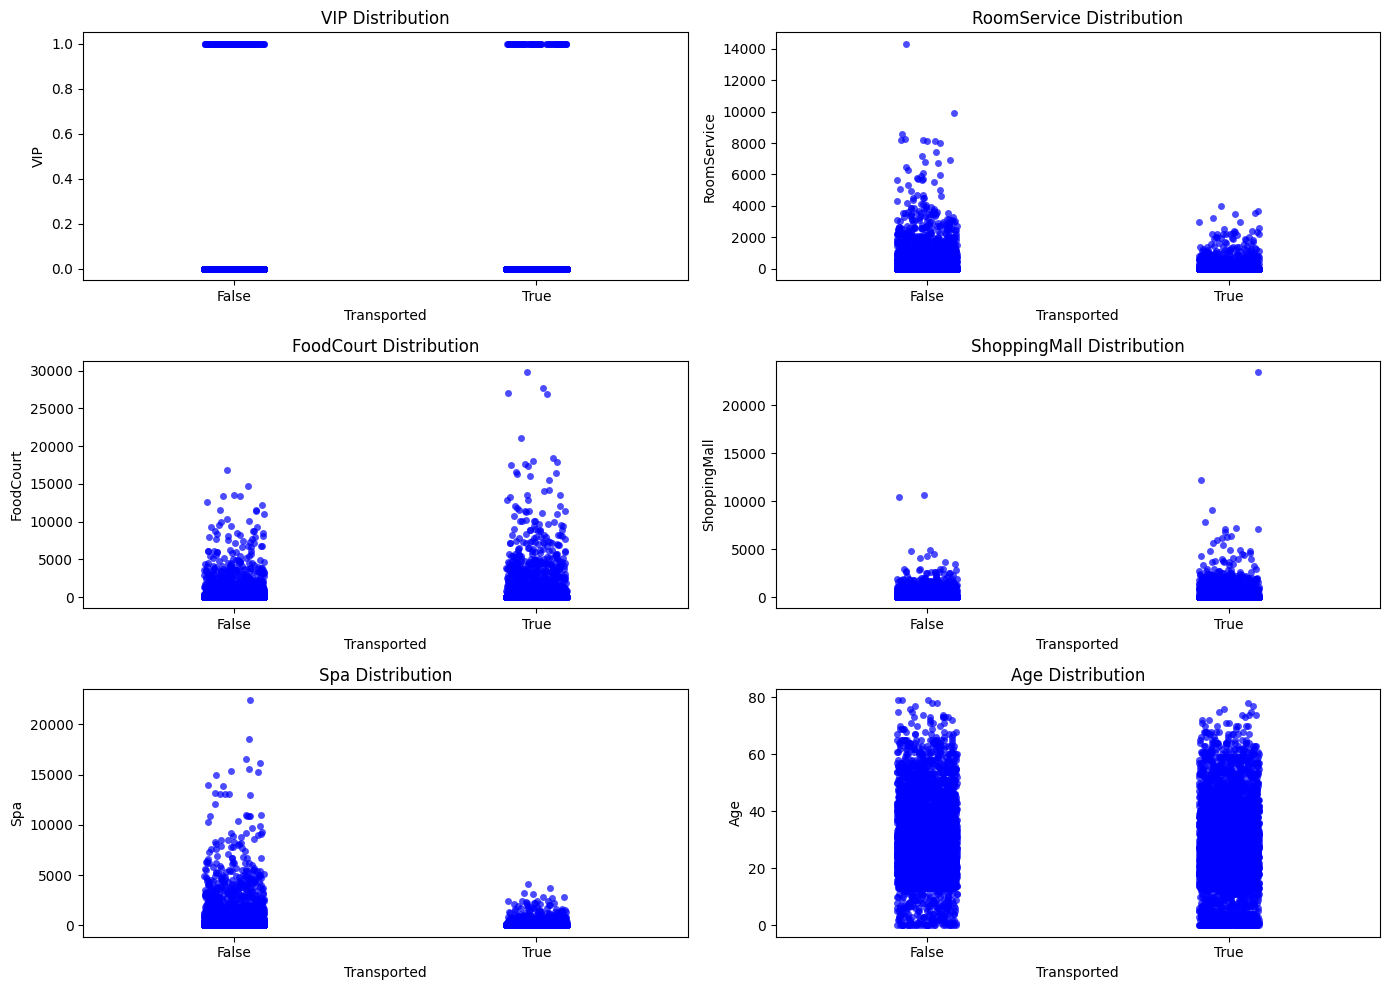

In [ ]:
# Selecting relevant columns for the dot plot
dot_plot_cols = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'Age']

# Set the figure size
plt.figure(figsize=(14, 10))

# Iterate over columns and create subplots
for idx, column in enumerate(dot_plot_cols, 1):
    plt.subplot(3, 2, idx)

    # Create a dot plot with seaborn
    sns.stripplot(x='Transported', y=column, data=df_train, jitter=True, color='blue', alpha=0.7)

    # Add title and adjust layout
    plt.title(f'{column} Distribution')
    plt.tight_layout()

# Show the plot
plt.show()

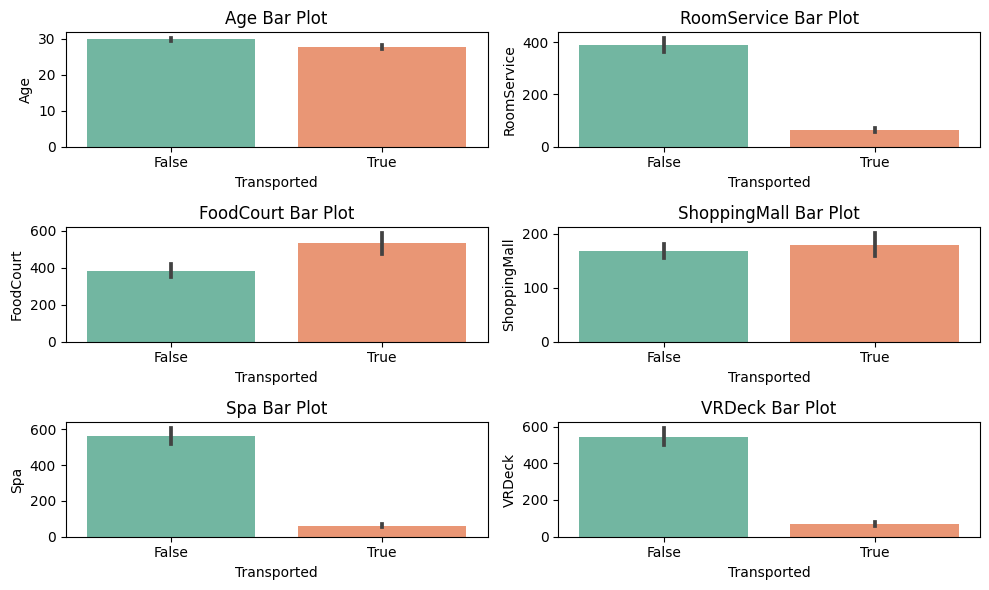

In [ ]:
# Selecting numerical features
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate over numerical features and create bar plots
for idx, column in enumerate(numerical_features, 1):
    plt.subplot(3, 2, idx)

    # Create a bar plot with seaborn
    sns.barplot(x='Transported', y=column, data=df_train, palette="Set2")

    # Add title and adjust layout
    plt.title(f"{column} Bar Plot")
    plt.tight_layout()

# Show the plot
plt.show()


# Preprocessing


In [ ]:
def split_cabin(df):
  df[['deck','num','side']]=df['Cabin'].str.split('/',expand=True)

  return df

df_train = split_cabin(df_train)
df_test = split_cabin(df_test)


In [ ]:
label_cols = ["HomePlanet", "CryoSleep","deck","side", "Destination" ,"VIP"]
import joblib
encoderDict = {}

def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        encoder = LabelEncoder()
        encoder.fit(train[col])
        encoderDict[col] = encoder.classes_
        train[col] = encoder.transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(df_train,df_test ,label_cols)

joblib.dump(encoderDict,'LabelEncoderClasses.joblib')

['LabelEncoderClasses.joblib']

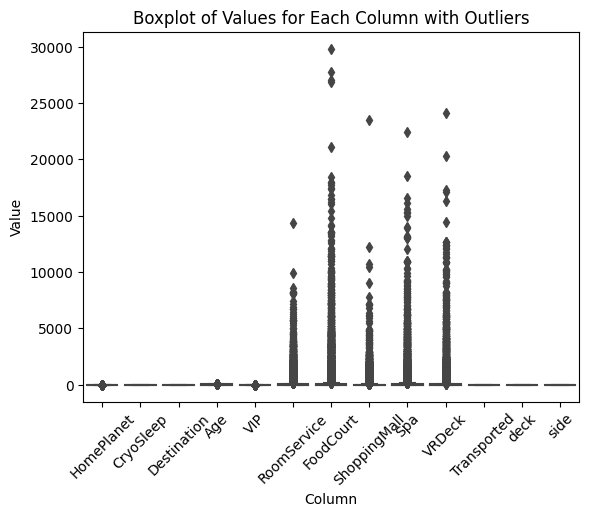

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
def preprocessing_missing_value(df):
  df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
  df['RoomService'].fillna(df['RoomService'].min(), inplace=True)
  df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
  df['VIP'].fillna(df['VIP'].mode()[0],inplace = True)
  df['Age'].fillna(df['Age'].mode()[0],inplace = True)
  df['Spa'].fillna(df['Spa'].mean(), inplace = True)
  df['Cabin'].fillna(df['Cabin'].mode(), inplace = True)
  df['VRDeck'].fillna(df['VRDeck'].median(), inplace = True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace = True)
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
  df['deck'].fillna(df['deck'].mode()[0],inplace = True)
  df['side'].fillna(df['side'].mode()[0],inplace = True)
  df['num'].fillna(df['num'].median(), inplace = True)
  df['num'] = df['num'].astype('int')
  return df

df_train = preprocessing_missing_value(df_train)
df_test = preprocessing_missing_value(df_test)


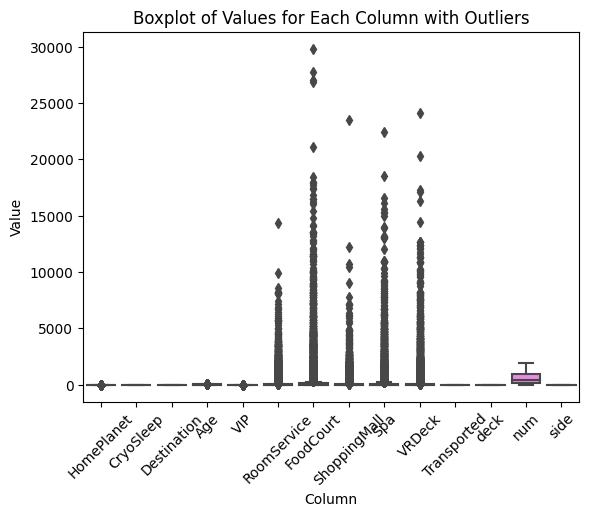

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Feature Engineering


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scr=StandardScaler()
minn=MinMaxScaler()


def scaling(df):
  df["FoodCourt"]= minn.fit_transform(df[["FoodCourt"]])
  df["RoomService"]= minn.fit_transform(df[["RoomService"]])
  df["ShoppingMall"]= minn.fit_transform(df[["ShoppingMall"]])
  df["Spa"]= minn.fit_transform(df[["Spa"]])
  df["Age"]= minn.fit_transform(df[["Age"]])
  df["VRDeck"]= minn.fit_transform(df[["VRDeck"]])
  df["num"]= scr.fit_transform(df[["num"]])

  return df
df_train = scaling(df_train)
df_test = scaling(df_test)
# add new row


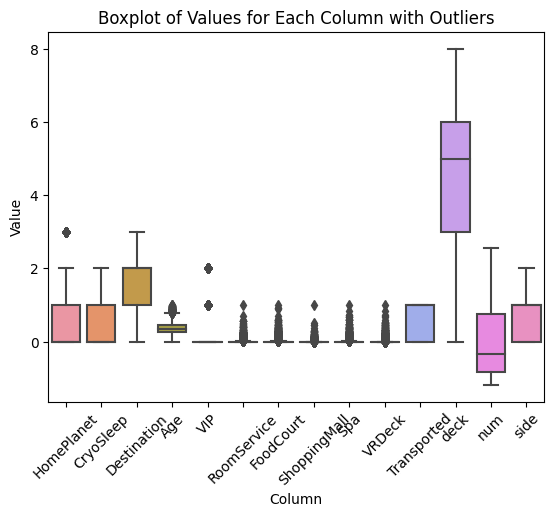

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

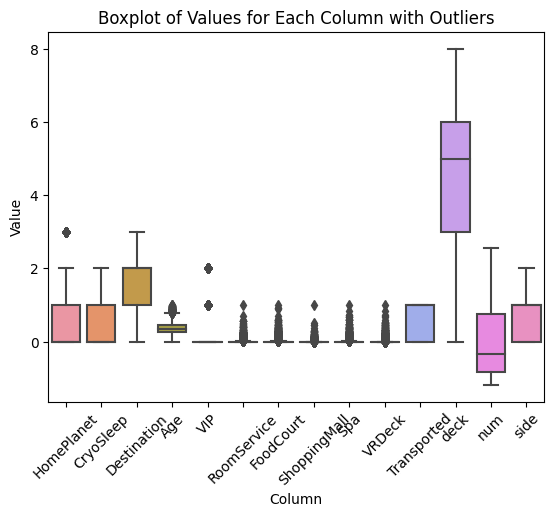

In [ ]:

#plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["VRDeck",'Age','HomePlanet','VIP']].quantile(quantile)
    for num_column in ["VRDeck",'Age','HomePlanet','VIP']:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

df_train = clipping_quantile(df_train, None, 0.99)
df_test = clipping_quantile(df_test, None, 0.99)

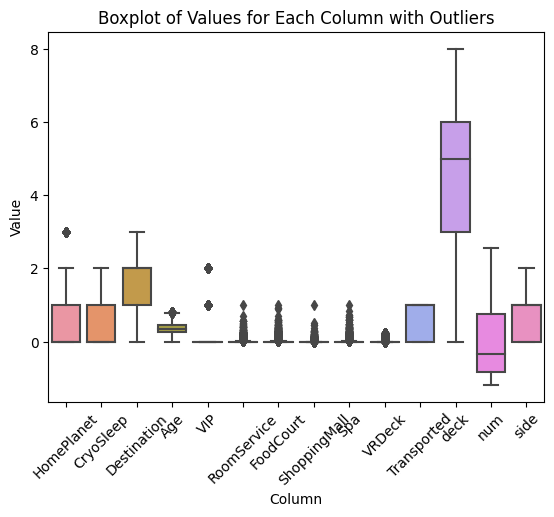

In [ ]:
sns.boxplot(data=df_train, fliersize=5)  # Set fliersize to highlight outliers
plt.title('Boxplot of Values for Each Column with Outliers')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Model Selection



In [ ]:
# required models
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier

def split_data(df):
   X = df.drop(columns=['Transported','PassengerId','Cabin','Name','Age_Category'])
   y = df['Transported']
   X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=1,shuffle=True)
   return X_train, X_test, y_train, y_test

def print_confusion_matrix(confusion_matrix):
  f, ax=plt.subplots(figsize=(5,5))
  sns.heatmap(confusion_matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
  plt.xlabel("Predicted Transported")
  plt.ylabel("Actual Transported")
  plt.show()

def train_classifiers(X_train, y_train):
    classifiers = {
        'Naive Bayes': BernoulliNB(),
        'KNN': KNeighborsClassifier(n_jobs=-1),
        'Logistic Regression': LogisticRegression(n_jobs=-1),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=272),
        'Random Forest': RandomForestClassifier(max_depth=11, n_estimators=100, random_state=200),
        'AdaBoost': AdaBoostClassifier(n_estimators=150, random_state=42, learning_rate=1),
        'XGBoost': XGBClassifier(gamma=1.5, subsample=1.0, max_depth=5, colsample_bytree=1.0, n_estimators=150)
    }

    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)

    return classifiers


In [ ]:

model_test_stat = pd.DataFrame(columns=["Classifier", "Accuracy Score", "F1 Score", "Precision", "Recall"])
model_train_stat = pd.DataFrame(columns=["Classifier", "Cross-validation mean score", "Training Accuracy"])
from sklearn.metrics import f1_score, precision_score, recall_score
def models_on_training(X_train, y_train):
    global model_train_stat
    model_results = []
    # get pretrained models
    classifiers = train_classifiers(X_train, y_train)

    for name, instance in classifiers.items():
        # print(f'============================== {name} Training Model Evaluation ==============================')
        # print(f'Cross-validation Mean : {cross_val_score(instance, X_train, y_train, cv=10).mean()}\n')
        # print(f'Model Accuracy(Training): {metrics.accuracy_score(y_train, instance.predict(X_train))}\n')
        # print(f'Confusion Matrix :\n ')
        # print(print_confusion_matrix( metrics.confusion_matrix(y_train, instance.predict(X_train))))
        # print(f'Classification report: {metrics.classification_report(y_train, instance.predict(X_train))}\n' )
        model_results.append((name, cross_val_score(instance, X_train, y_train, cv=10).mean(), metrics.accuracy_score(y_train, instance.predict(X_train))))
    model_df = pd.DataFrame(model_results, columns=["Classifier", "Cross-validation mean score", "Training Accuracy"])

    model_train_stat = pd.concat([model_train_stat, model_df], ignore_index=True)
    return classifiers

def model_performance_in_test(models, X_test, y_test):
  global model_test_stat
  model_results = []
  for name, instance in models.items():

        y_pred = instance.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        model_results.append((name, accuracy, f1, precision, recall))

  model_df = pd.DataFrame(model_results, columns=["Classifier", "Accuracy Score", "F1 Score", "Precision", "Recall"])

  model_test_stat = pd.concat([model_test_stat, model_df], ignore_index=True)



In [ ]:
def pipeline(df, df_test):
  X_train, X_test, y_train, y_test = split_data(df)
  models = models_on_training(X_train, y_train)
  model_performance_in_test(models, X_test, y_test)
  model = XGBClassifier(gamma=1.5, subsample=1.0, max_depth=5, colsample_bytree=1.0, n_estimators=150)
  model.fit(X_train, y_train)

  # df_test = df_test.drop(columns=['PassengerId','Cabin','Name'])
  # y_pred = model.predict(df_test)
  # submission_df = create_submission_dataframe(y_pred, test["PassengerId"])


  # # Set Transported to boolean
  # submission_df["Transported"] = submission_df["Transported"].apply(
  #     lambda x: True if x == 1 else False
  # )
  # # To save the DataFrame as a CSV file
  # submission_df.to_csv("submission.csv", index=False)
  # import pickle

  # with open('model.pickle', 'wb') as f:
  #     pickle.dump(model, f)

In [ ]:
pipeline(df_train, df_test)

In [ ]:
print(f'Training Results\n{model_train_stat}\n\n\nTesting Results\n{model_test_stat}')



Training Results
            Classifier  Cross-validation mean score  Training Accuracy
0          Naive Bayes                     0.735263           0.735260
1                  KNN                     0.723327           0.812338
2  Logistic Regression                     0.762299           0.764308
3        Decision Tree                     0.751799           0.999569
4        Random Forest                     0.804141           0.883808
5             AdaBoost                     0.794510           0.807737
6              XGBoost                     0.804429           0.845557


Testing Results
            Classifier  Accuracy Score  F1 Score  Precision    Recall
0          Naive Bayes        0.737780  0.736741   0.742346  0.737780
1                  KNN        0.743531  0.743254   0.744998  0.743531
2  Logistic Regression        0.764232  0.763791   0.766768  0.764232
3        Decision Tree        0.745831  0.745784   0.745897  0.745831
4        Random Forest        0.802185  0.80211

In [ ]:
model_train_stat


,Classifier,Cross-validation mean score,Training Accuracy
0,Naive Bayes,0.735263,0.735260
1,KNN,0.723327,0.812338
2,Logistic Regression,0.762299,0.764308
3,Decision Tree,0.751799,0.999569
4,Random Forest,0.804141,0.883808
5,AdaBoost,0.794510,0.807737
6,XGBoost,0.804429,0.845557


In [ ]:
model_test_stat

,Classifier,Accuracy Score,F1 Score,Precision,Recall
0,Naive Bayes,0.737780,0.736741,0.742346,0.737780
1,KNN,0.743531,0.743254,0.744998,0.743531
2,Logistic Regression,0.764232,0.763791,0.766768,0.764232
3,Decision Tree,0.745831,0.745784,0.745897,0.745831
4,Random Forest,0.802185,0.802119,0.802411,0.802185
5,AdaBoost,0.796435,0.796237,0.797257,0.796435
6,XGBoost,0.815986,0.815932,0.816189,0.815986


# Saving the best model in pickle


In [ ]:
def create_submission_dataframe(y_test_pred, passenger_ids, threshold = 0.5):
    # Convert probabilities to binary outputs
    y_test_pred_binary = (y_test_pred > threshold).astype(int).flatten()

    # Create a DataFrame for submission
    submission_df = pd.DataFrame(
        {"PassengerId": passenger_ids, "Transported": y_test_pred_binary}
    )

    return submission_df

In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
0,0013_01,0.0,1,G/3/S,2,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning,6,-1.184031,1
1,0018_01,0.0,0,F/4/S,2,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers,5,-1.182068,1
2,0019_01,1.0,1,C/0/S,0,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus,2,-1.189919,1
3,0021_01,1.0,0,C/1/S,2,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter,2,-1.187956,1
4,0023_01,0.0,0,F/5/S,2,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez,5,-1.180105,1
